In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC

In [57]:
# Split the dataset in a train and test.
shaft_data = pd.read_csv('shaft_radius.csv')
X = shaft_data['measurement_index']
y = shaft_data['shaft_radius']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 42)

Text(0.5, 1.0, 'Shaft Radius Data')

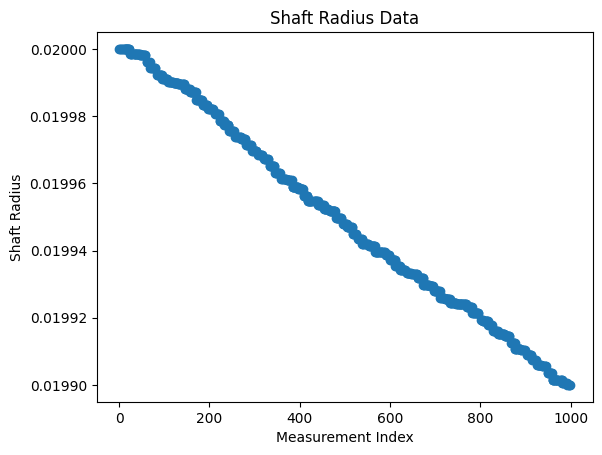

In [58]:
# Use the train set to plot the data in a suitable manner. 
plt.scatter(X_train, y_train)
plt.xlabel('Measurement Index')
plt.ylabel('Shaft Radius')
plt.title('Shaft Radius Data')


In [99]:
# In this case, we use Linear Regression because of the linear pattern and continuous (quantitative) variables seen in the data.
model = LinearRegression()
model.fit(X.values.reshape(-1,1), y)

# the intercept and slope
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_[0])
print(f'Linear Regression\'s Equation: {np.round(model.coef_[0], 8)}x + {model.intercept_}')

# predict using the model
y_train_pred = model.predict(X_train.values.reshape(-1,1))
y_test_pred = model.predict(X_test.values.reshape(-1,1))

Intercept:  0.020001192716625118
Slope:  -1.0332535513396363e-07
Linear Regression's Equation: -1e-07x + 0.020001192716625118


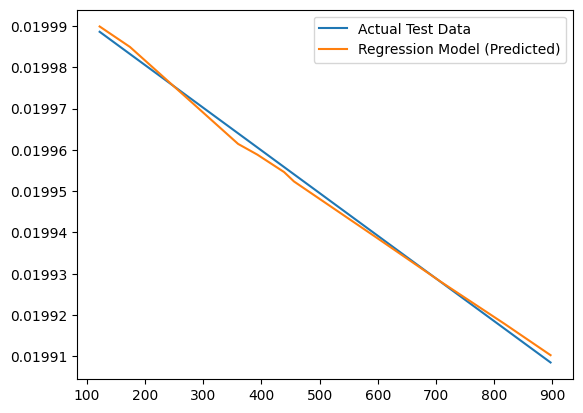

In [98]:
# Plot the predictions of the regression model with the test data. 
plt.plot(X_test, y_test_pred, label='Actual Test Data')
plt.plot(X_test, y_test, label='Regression Model (Predicted)')
plt.legend()

In [ ]:
# Evaluate the model with MSE and R^2
MSE_test = mean_squared_error(y_test, y_test_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
r2_score_train = r2_score(y_train, y_train_pred)

print('\nMSE (Test data):', MSE_test)
print('MSE (Train data):', MSE_train)
print(r2_score_test, r2_score_train)
print('Model is performing well on unseen data:', MSE_test < MSE_train)

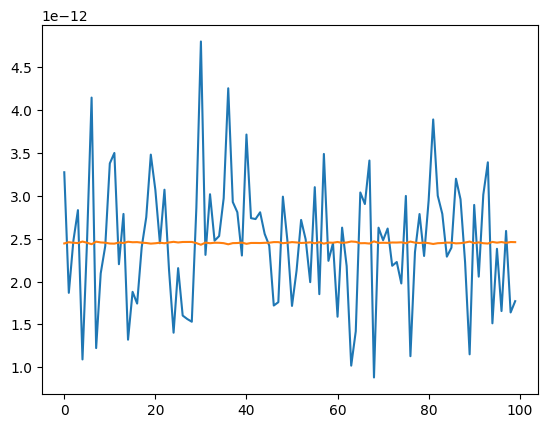

In [110]:
# (Keep it or not???? idk)
# However, assessing the model's performance using one train and test data might be unfair and unwise.
# That is why we implemented KFold.
not_overfitting = 0
    
# KFold with 100 folds
kf = KFold(n_splits=100, shuffle=True, random_state=42)
list_mse_test = []
list_mse_train = []
for train_idx, test_idx in kf.split(shaft_data):
    train_data = shaft_data.iloc[train_idx]
    test_data = shaft_data.iloc[test_idx]

    X_train = train_data['measurement_index']
    y_train = train_data['shaft_radius']
    model = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train) # Why reshape here???

    X_test = test_data['measurement_index']
    y_test = test_data['shaft_radius']

    y_train_pred = model.predict(X_train.values.reshape(-1, 1)) # Why reshape here???
    y_test_pred = model.predict(X_test.values.reshape(-1, 1)) # Why reshape here???
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    r2_score_train = r2_score(y_train, y_train_pred)

    list_mse_test.append(mse_test)
    list_mse_train.append(mse_train)

plt.plot(np.arange(100), list_mse_test, label='MSE Test')
plt.plot(np.arange(100), list_mse_train, label='MSE Train')

In [ ]:
# Why do we use MSE and R^2?
# MSE: To compare errors in the train and test data, and know whether the model is overfitting based on it (bias-variance trade-off).
# Pros: 
# Cons:

# R^2: To evaluate linear regression models’ fit.
# Pros: 
# Cons:

# Model's Reliability
# As shown above, we can see the MSE for both train and test data are incredibly small, which means the model
# fits the data very well. Moreover, the R2 score for both test and train data is approximately 1, which means
# the variance of the model is explained perfectly by the model.

# As a summary, we can safely tell that this is a good and reliable model to predict the radius of the drive shaft
# based on the time that the drive shaft had been running. Despite the dramatically low MSE values, we should not be
# worried too much about overfitting because this is a time-based data and has a clear linear pattern.

# What would you do to improve the model (for example, if you had more time)?
# 